<a href="https://colab.research.google.com/github/ibshafique/mlops_with_poridhi/blob/main/prerequisite_projects/Car_Price/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites


Importing the related libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Importing the dataset.

In [54]:
train_url = "https://raw.githubusercontent.com/ibshafique/mlops_with_poridhi/refs/heads/main/prerequisite_projects/Car_Price/dataset/car_price.csv"
train_df = pd.read_csv(train_url)

# Data Insights

In [55]:
train_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [56]:
train_df.shape

(8128, 13)

In [57]:
train_df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [58]:
train_df.duplicated().sum()

1202

# Data Cleaning

The 'torque' values donot have much relation with the price of a car. So we are dropping this column.

In [59]:
train_df = train_df.drop(columns=['torque'])

In the previous section we saw there are some rows with missing values, so we are dropping those rows.

We are also dropping the duplicated values of rows.

In [60]:
train_df.dropna(inplace=True)
train_df.drop_duplicates(inplace=True)
train_df.shape

(6718, 12)

In [61]:
train_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


Now we will be extracting the values from these columns:

i. name
ii. mileage
iii. engine
iv. max_power

In [62]:
train_df['name'] = train_df['name'].str.split(' ').str[0]
train_df['mileage'] = train_df['mileage'].str.split(' ').str[0].astype(float)
train_df['engine'] = train_df['engine'].str.split(' ').str[0].astype(float)
train_df['max_power'] = train_df['max_power'].str.split(' ').str[0]

#there was a non-numerical value in the 'max_power' column, so removed that with:
train_df['max_power'] = pd.to_numeric(train_df['max_power'], errors='coerce')
train_df.dropna(inplace=True)

train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 682.2+ KB


In [63]:
print(train_df['name'].unique())
print('')
print(train_df['fuel'].unique())
print('')
print(train_df['seller_type'].unique())
print('')
print(train_df['transmission'].unique())

['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']

['Diesel' 'Petrol' 'LPG' 'CNG']

['Individual' 'Dealer' 'Trustmark Dealer']

['Manual' 'Automatic']


The columns 'name', 'fuel', 'transmission_type' and 'owner' are objects.
We will convert them to integers.

In [64]:
train_df['name'] = train_df['name'].replace({'Maruti': 1 , 'Skoda': 2, 'Honda': 3, 'Hyundai': 4, 'Toyota': 5, 'Ford': 6, 'Renault': 7,
                                             'Mahindra': 8 , 'Tata': 9 , 'Chevrolet': 10, 'Datsun': 11, 'Jeep': 12, 'Mercedes-Benz': 13,
                                             'Mitsubishi': 14, 'Audi': 15, 'Volkswagen': 16, 'BMW': 17, 'Nissan': 18, 'Lexus': 19,
                                             'Jaguar': 20, 'Land': 21, 'MG': 22, 'Volvo': 23, 'Daewoo': 24, 'Kia': 25, 'Fiat': 26, 'Force': 27,
                                             'Ambassador': 28, 'Ashok': 29, 'Isuzu': 30, 'Opel': 31})

train_df['transmission'] = train_df['transmission'].replace({'Manual': 1, 'Automatic': 2})

train_df['seller_type'] = train_df['seller_type'].replace({'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3})

train_df['fuel'] = train_df['fuel'].replace({'Diesel': 1, 'Petrol': 2, 'LPG': 3, 'CNG': 4})

train_df['owner'] = train_df['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})


<ipython-input-64-1043b1c215cf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['name'] = train_df['name'].replace({'Maruti': 1 , 'Skoda': 2, 'Honda': 3, 'Hyundai': 4, 'Toyota': 5, 'Ford': 6, 'Renault': 7,
<ipython-input-64-1043b1c215cf>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['transmission'] = train_df['transmission'].replace({'Manual': 1, 'Automatic': 2})
<ipython-input-64-1043b1c215cf>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain

In [65]:
train_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
8122,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
8123,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   int64  
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   int64  
 5   seller_type    6717 non-null   int64  
 6   transmission   6717 non-null   int64  
 7   owner          6717 non-null   int64  
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 682.2 KB


# Data Visualisation

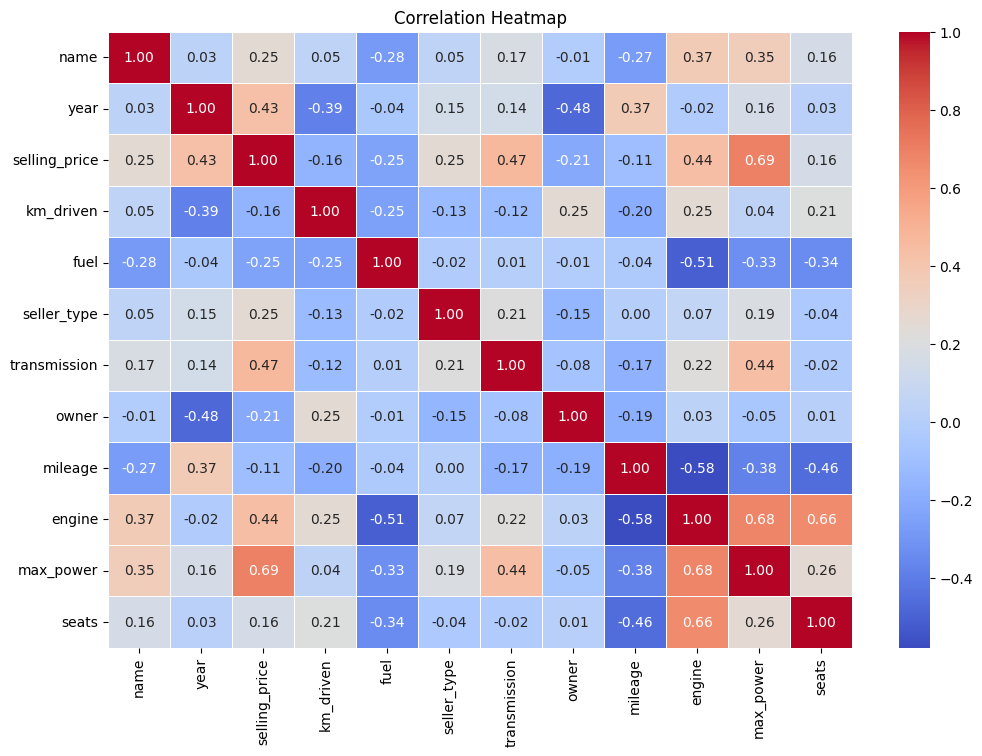

In [67]:
corr_matrix = train_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [68]:
# Compute the correlation matrix
corr_matrix = train_df.corr().abs()  # Compute absolute correlation values

# Extract correlations with 'selling_price'
selling_price_corr = corr_matrix["selling_price"].sort_values(ascending=False)

# Filter values greater than 0.4 for high correlation (adjustable threshold)
high_corr_selling_price = selling_price_corr[selling_price_corr > 0.4]

# Convert to DataFrame for better readability
high_corr_selling_price_df = high_corr_selling_price.reset_index()
high_corr_selling_price_df.columns = ["Feature", "Correlation with Selling Price"]

# Display the results
print(high_corr_selling_price_df)

         Feature  Correlation with Selling Price
0  selling_price                        1.000000
1      max_power                        0.692323
2   transmission                        0.465538
3         engine                        0.442772
4           year                        0.427335


# Trainig The Data